# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier

## Import Data

In [2]:
info = pd.read_excel("Data/data_dictionary.xlsx")

In [3]:
info

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [4]:
survey= pd.read_csv("Data/employee_survey_data.csv")
survey.columns= survey.columns.str.lower()
survey

,employeeid,environmentsatisfaction,jobsatisfaction,worklifebalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [5]:
#check for nan values
survey.isnull().values.any()

True

In [6]:
display(survey.isnull().sum())

employeeid                  0
environmentsatisfaction    25
jobsatisfaction            20
worklifebalance            38
dtype: int64

In [7]:
general= pd.read_csv('Data/general_data.csv')
general
general.columns= general.columns.str.lower()
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [8]:
general["employeecount"].unique()

array([1])

In [9]:
general["over18"].value_counts()

Y    4410
Name: over18, dtype: int64

In [10]:
manager= pd.read_csv('Data/manager_survey_data.csv')
manager.columns= manager.columns.str.lower()

In [11]:
general["over18"].unique()

array(['Y'], dtype=object)

In [12]:
# merge data sets

In [13]:
general= pd.merge(general, survey, on = "employeeid", how = "inner")
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [14]:
general= pd.merge(general, manager, on = "employeeid", how = "inner")

In [15]:
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [16]:
general.dtypes

age                          int64
attrition                   object
businesstravel              object
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeeid                   int64
gender                      object
joblevel                     int64
jobrole                     object
maritalstatus               object
monthlyincome                int64
numcompaniesworked         float64
over18                      object
percentsalaryhike            int64
standardhours                int64
stockoptionlevel             int64
totalworkingyears          float64
trainingtimeslastyear        int64
yearsatcompany               int64
yearssincelastpromotion      int64
yearswithcurrmanager         int64
environmentsatisfaction    float64
jobsatisfaction            float64
worklifebalance            float64
jobinvolvement               int64
performancerating   

In [17]:
general['jobsatisfaction'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [18]:
general['totalworkingyears'].unique()

array([ 1.,  6.,  5., 13.,  9., 28., 10., 21., 16., 37.,  7.,  3., 15.,
        8., nan, 12., 17., 19., 22.,  2.,  4., 23.,  0., 11., 24., 25.,
       20., 14., 26., 18., 30., 36., 31., 33., 32., 34., 40., 29., 35.,
       27., 38.])

In [19]:
display(general.isnull().sum())

age                         0
attrition                   0
businesstravel              0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeeid                  0
gender                      0
joblevel                    0
jobrole                     0
maritalstatus               0
monthlyincome               0
numcompaniesworked         19
over18                      0
percentsalaryhike           0
standardhours               0
stockoptionlevel            0
totalworkingyears           9
trainingtimeslastyear       0
yearsatcompany              0
yearssincelastpromotion     0
yearswithcurrmanager        0
environmentsatisfaction    25
jobsatisfaction            20
worklifebalance            38
jobinvolvement              0
performancerating           0
dtype: int64

In [20]:
general.drop_duplicates()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3


# Data Cleaning

## Replacing null value with 0

In [21]:
np.where(general['numcompaniesworked'].isnull())[0]

array([ 115,  210,  343,  476,  647,  799,  932, 1103, 1312, 1521, 1711,
       1996, 2365, 2696, 3063, 3533, 3910, 4226, 4395])

In [22]:
general['numcompaniesworked'] = general['numcompaniesworked'].fillna(value = 0)

In [23]:
general['numcompaniesworked'].isnull().sum()

0

In [24]:
general['numcompaniesworked'].value_counts()

1.0    1558
0.0     605
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: numcompaniesworked, dtype: int64

## Replacing null value with mode

In [25]:
np.where(general['environmentsatisfaction'].isnull())[0]

array([  11,  111,  195,  300,  405,  489,  678,  846,  909, 1077, 1224,
       1476, 1812, 2148, 2379, 2568, 2736, 2925, 3114, 3261, 3387, 3534,
       3681, 3996, 4332])

In [26]:
for column in ['environmentsatisfaction']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [27]:
general['environmentsatisfaction'].isnull().sum()

0

## Replacing null value with mode

In [28]:
np.where(general['jobsatisfaction'].isnull())[0]

array([  40,  124,  313,  586,  859, 1195, 1468, 1678, 1909, 2182, 2476,
       2707, 2875, 3085, 3295, 3526, 3778, 4030, 4219, 4345])

In [29]:
for column in ['jobsatisfaction']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [30]:
general['jobsatisfaction'].isnull().sum()

0

## Replacing null value with mode

In [31]:
np.where(general['worklifebalance'].isnull())[0]

array([  84,  273,  483,  609,  735,  861,  987, 1092, 1197, 1260, 1323,
       1407, 1470, 1533, 1596, 1659, 1722, 1785, 1848, 1911, 1953, 2016,
       2079, 2142, 2226, 2310, 2394, 2478, 2583, 2709, 2898, 3024, 3339,
       3654, 3885, 4116, 4305, 4409])

In [32]:
for column in ['worklifebalance']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [33]:
general['worklifebalance'].isnull().sum()

0

## Replacing null value with mode totalworkingyears

In [34]:
for column in ['totalworkingyears']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [35]:
general.isnull().sum()

age                        0
attrition                  0
businesstravel             0
department                 0
distancefromhome           0
education                  0
educationfield             0
employeecount              0
employeeid                 0
gender                     0
joblevel                   0
jobrole                    0
maritalstatus              0
monthlyincome              0
numcompaniesworked         0
over18                     0
percentsalaryhike          0
standardhours              0
stockoptionlevel           0
totalworkingyears          0
trainingtimeslastyear      0
yearsatcompany             0
yearssincelastpromotion    0
yearswithcurrmanager       0
environmentsatisfaction    0
jobsatisfaction            0
worklifebalance            0
jobinvolvement             0
performancerating          0
dtype: int64

## Handling Null Value

In [36]:
for column in general.columns:
    if general[column].dtype == 'float64':
        general[column] = general[column].astype('int64')

In [37]:
general.dtypes

age                         int64
attrition                  object
businesstravel             object
department                 object
distancefromhome            int64
education                   int64
educationfield             object
employeecount               int64
employeeid                  int64
gender                     object
joblevel                    int64
jobrole                    object
maritalstatus              object
monthlyincome               int64
numcompaniesworked          int64
over18                     object
percentsalaryhike           int64
standardhours               int64
stockoptionlevel            int64
totalworkingyears           int64
trainingtimeslastyear       int64
yearsatcompany              int64
yearssincelastpromotion     int64
yearswithcurrmanager        int64
environmentsatisfaction     int64
jobsatisfaction             int64
worklifebalance             int64
jobinvolvement              int64
performancerating           int64
dtype: object

## Dropping not informative columns

In [38]:
general['over18'].value_counts()

Y    4410
Name: over18, dtype: int64

In [39]:
general['employeecount'].value_counts()

1    4410
Name: employeecount, dtype: int64

In [40]:
general['standardhours'].value_counts()

8    4410
Name: standardhours, dtype: int64

In [41]:
general = general.drop(['over18','employeecount', 'standardhours' ], axis = 1).reset_index(drop = True)


In [42]:
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,3,4,2,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,3,2,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,2,2,1,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5,4,4,3,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3,17,1,10,5,3,0,2,4,1,3,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2,15,0,10,2,3,0,2,4,4,3,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0,20,0,5,4,4,1,2,1,3,3,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0,14,1,10,2,9,7,8,4,1,3,2,3


# Data Processing

## Transforming dt Time

In [43]:
in_time= pd.read_csv('Data/in_time.csv')
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [44]:
out_time = pd.read_csv('Data/out_time.csv')
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [45]:
## Concat time data sets

In [46]:
total_time= in_time.append(out_time)
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [47]:
# remove 0 values (0 values are days where the office was closed)


In [48]:
total_time = total_time.dropna(axis=1, how='all')

In [49]:
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-0

In [50]:
# replace individual days that have NaN with 0 ( for future calculations)

In [51]:
total_time.fillna(0, inplace= True)
total_time

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,0,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,0,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,0,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,0,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-08 10:04:

In [52]:
## Convert to datatime format

In [53]:
total_time.iloc[:,1:]= total_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce') 

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [54]:
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,1970-01-01 00:00:00,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,1970-01-01 00:00:00,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-

In [55]:
total_time = total_time.diff(periods=4410)

In [56]:
total_time = total_time.iloc[4410:]

In [57]:
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:3

In [58]:
total_time.reset_index(inplace=True)

/var/folders/x7/r2pcnk8558z12w_v99lrx7z00000gn/T/ipykernel_3258/3380500208.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  total_time.reset_index(inplace=True)


In [59]:
total_time

,index,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 d

In [60]:
total_time.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True)

In [61]:
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,0 days 07:

In [62]:
total_time['mean_time'] = total_time.mean(axis=1)

In [63]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,

In [64]:
# convert mean time into hours
total_time.mean_time = total_time.mean_time.apply(lambda x : int(str(x).split(' ')[2].split(':')[0]) + int(str(x).split(' ')[2].split(':')[1])/60 + float(str(x).split(' ')[2].split(':')[2])/3600)
total_time.index = range(1,len(total_time)+1)

In [65]:
total_time.reset_index(inplace=True)

In [66]:
total_time

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 0

In [67]:
total_time.index = range(1,len(total_time)+1)

In [68]:
# Rename index as emID to add the general data set
total_time = total_time.rename(columns = {'index' : 'employeeid'})

In [69]:
# Overwrite totalt only with the columns we need for general
total_time = total_time[['employeeid','mean_time']]  


In [70]:
general = pd.merge(general, total_time, on = 'employeeid', how = 'inner')

In [71]:
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,3,4,2,3,3,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,3,2,4,2,4,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,2,2,1,3,3,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5,4,4,3,2,3,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4,4,1,3,3,3,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3,17,1,10,5,3,0,2,4,1,3,3,3,8.316921
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2,15,0,10,2,3,0,2,4,4,3,2,3,5.897197
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0,20,0,5,4,4,1,2,1,3,3,3,4,7.149526
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0,14,1,10,2,9,7,8,4,1,3,2,3,9.187612


In [72]:
general.to_csv('Data/general_hr_data.csv')

In [73]:
general[['mean_time','jobrole']].groupby('jobrole').mean().sort_values(by='mean_time', ascending= False)

,mean_time
jobrole,
Sales Representative,7.408597
Manufacturing Director,7.387167
Research Director,7.350537
Research Scientist,7.323176
Sales Executive,7.319793
Manager,7.299237
Healthcare Representative,7.286895
Laboratory Technician,7.253431
Human Resources,7.224099


In [74]:
general.attrition.eq('Yes').groupby(general.jobrole).sum()

jobrole
Healthcare Representative     57
Human Resources               21
Laboratory Technician        126
Manager                       42
Manufacturing Director        48
Research Director             57
Research Scientist           159
Sales Executive              165
Sales Representative          36
Name: attrition, dtype: int64

In [75]:
general.attrition.eq('No').groupby(general.jobrole).sum()

jobrole
Healthcare Representative    336
Human Resources              135
Laboratory Technician        651
Manager                      264
Manufacturing Director       387
Research Director            183
Research Scientist           717
Sales Executive              813
Sales Representative         213
Name: attrition, dtype: int64

In [76]:
#filtered_time = general[general['mean_time'] < 7.5] 
#filtered_time

In [77]:
#filtered_time[['mean_time','jobrole']].groupby('jobrole').mean().sort_values(by='mean_time', ascending= False)

## Data Distribution

In [78]:
general['businesstravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: businesstravel, dtype: int64

In [79]:
general['department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: department, dtype: int64

In [80]:
general['distancefromhome'].value_counts()

2     633
1     624
10    258
9     255
3     252
7     252
8     240
5     195
4     192
6     177
16     96
11     87
24     84
23     81
29     81
18     78
15     78
25     75
26     75
20     75
28     69
19     66
14     63
17     60
12     60
22     57
13     57
21     54
27     36
Name: distancefromhome, dtype: int64

In [81]:
general['education'].value_counts()

3    1716
4    1194
2     846
1     510
5     144
Name: education, dtype: int64

<AxesSubplot:xlabel='mean_time', ylabel='Count'>

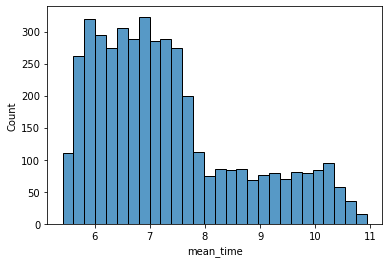

In [82]:
sns.histplot(general['mean_time'])

In [83]:
general['educationfield'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: educationfield, dtype: int64

In [84]:
general['joblevel'].value_counts()

1    1629
2    1602
3     654
4     318
5     207
Name: joblevel, dtype: int64

In [85]:
general['jobrole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: jobrole, dtype: int64

In [86]:
general['maritalstatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: maritalstatus, dtype: int64

In [87]:
general['monthlyincome'].sort_values(ascending= False)

3325    199990
1855    199990
385     199990
941     199730
3881    199730
         ...  
3862     10510
2392     10510
2178     10090
708      10090
3648     10090
Name: monthlyincome, Length: 4410, dtype: int64

<AxesSubplot:xlabel='monthlyincome', ylabel='Count'>

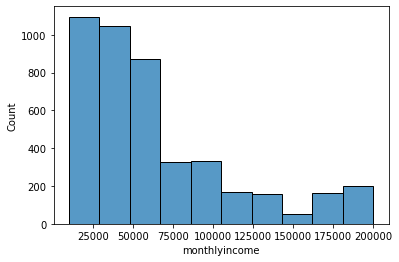

In [88]:
sns.histplot(general['monthlyincome'],bins= 10)

In [89]:
general['numcompaniesworked'].value_counts()

1    1558
0     605
3     474
2     438
4     415
7     222
6     208
5     187
9     156
8     147
Name: numcompaniesworked, dtype: int64

In [90]:
general['percentsalaryhike'].value_counts()

11    630
13    627
14    603
12    594
15    303
18    267
17    246
16    234
19    228
22    168
20    165
21    144
23     84
24     63
25     54
Name: percentsalaryhike, dtype: int64

<AxesSubplot:xlabel='percentsalaryhike', ylabel='Count'>

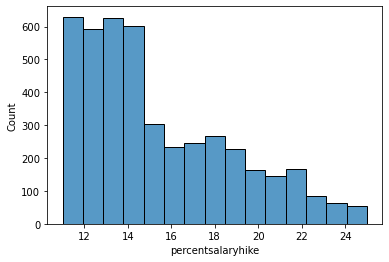

In [91]:
sns.histplot(general['percentsalaryhike'],bins= 15)

In [92]:
general['stockoptionlevel'].value_counts()

0    1893
1    1788
2     474
3     255
Name: stockoptionlevel, dtype: int64

In [93]:
general['totalworkingyears'].value_counts()

10    614
6     375
8     307
9     287
5     264
7     243
1     242
4     189
12    144
3     126
15    120
16    111
13    108
11    106
21    102
17     99
14     93
2      93
20     89
18     81
23     66
19     66
22     62
24     54
25     42
26     42
28     42
0      33
29     30
31     27
32     27
27     21
30     21
33     21
36     18
34     15
37     12
35      9
40      6
38      3
Name: totalworkingyears, dtype: int64

In [94]:
general['trainingtimeslastyear'].value_counts()

2    1641
3    1473
4     369
5     357
1     213
6     195
0     162
Name: trainingtimeslastyear, dtype: int64

In [95]:
general['yearsatcompany'].value_counts()

5     588
1     513
3     384
2     381
10    360
4     330
7     270
9     246
8     240
6     228
0     132
11     96
20     81
13     72
15     60
14     54
22     45
12     42
21     42
18     39
16     36
19     33
17     27
24     18
33     15
26     12
25     12
31      9
32      9
29      6
27      6
36      6
23      6
34      3
30      3
37      3
40      3
Name: yearsatcompany, dtype: int64

<AxesSubplot:xlabel='yearsatcompany', ylabel='Count'>

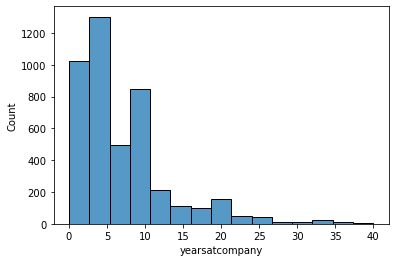

In [96]:
sns.histplot(general['yearsatcompany'],bins= 15)

In [97]:
general['yearssincelastpromotion'].value_counts()

0     1743
1     1071
2      477
7      228
4      183
3      156
5      135
6       96
11      72
8       54
9       51
15      39
13      30
12      30
14      27
10      18
Name: yearssincelastpromotion, dtype: int64

<AxesSubplot:xlabel='yearssincelastpromotion', ylabel='Count'>

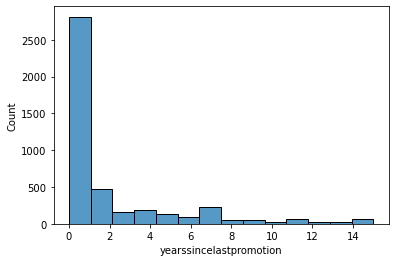

In [98]:
sns.histplot(general['yearssincelastpromotion'],bins= 14)

In [99]:
general['yearswithcurrmanager'].value_counts()

2     1032
0      789
7      648
3      426
8      321
4      294
1      228
9      192
5       93
6       87
10      81
11      66
12      54
13      42
17      21
15      15
14      15
16       6
Name: yearswithcurrmanager, dtype: int64

In [100]:
general['environmentsatisfaction'].value_counts()

3    1375
4    1334
2     856
1     845
Name: environmentsatisfaction, dtype: int64

<AxesSubplot:xlabel='environmentsatisfaction', ylabel='Count'>

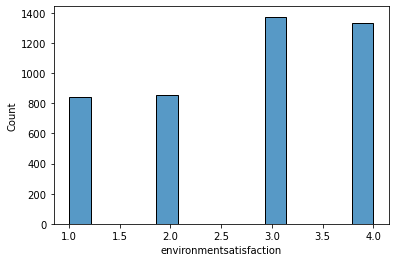

In [101]:
sns.histplot(general['environmentsatisfaction'])

<AxesSubplot:xlabel='jobsatisfaction', ylabel='Count'>

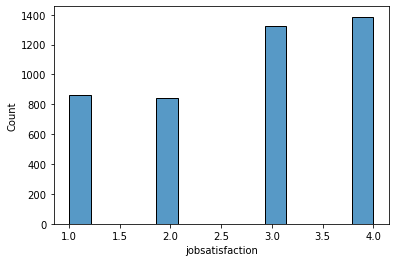

In [102]:
sns.histplot(general['jobsatisfaction'])

In [103]:
general['worklifebalance'].value_counts()

3    2698
2    1019
4     454
1     239
Name: worklifebalance, dtype: int64

<AxesSubplot:xlabel='worklifebalance', ylabel='Count'>

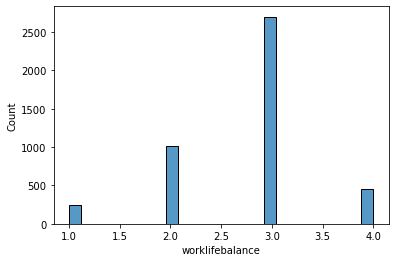

In [104]:
sns.histplot(general['worklifebalance'])

<AxesSubplot:xlabel='jobinvolvement', ylabel='Count'>

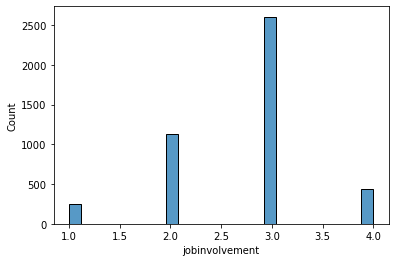

In [105]:
sns.histplot(general['jobinvolvement'])

<AxesSubplot:xlabel='performancerating', ylabel='Count'>

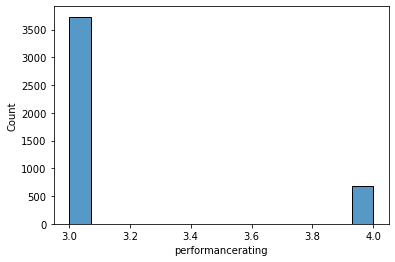

In [106]:
sns.histplot(general['performancerating'])

In [107]:
general['performancerating'].value_counts()

3    3732
4     678
Name: performancerating, dtype: int64

<AxesSubplot:xlabel='mean_time', ylabel='Count'>

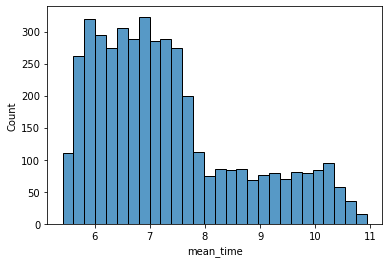

In [108]:
sns.histplot(general['mean_time'])

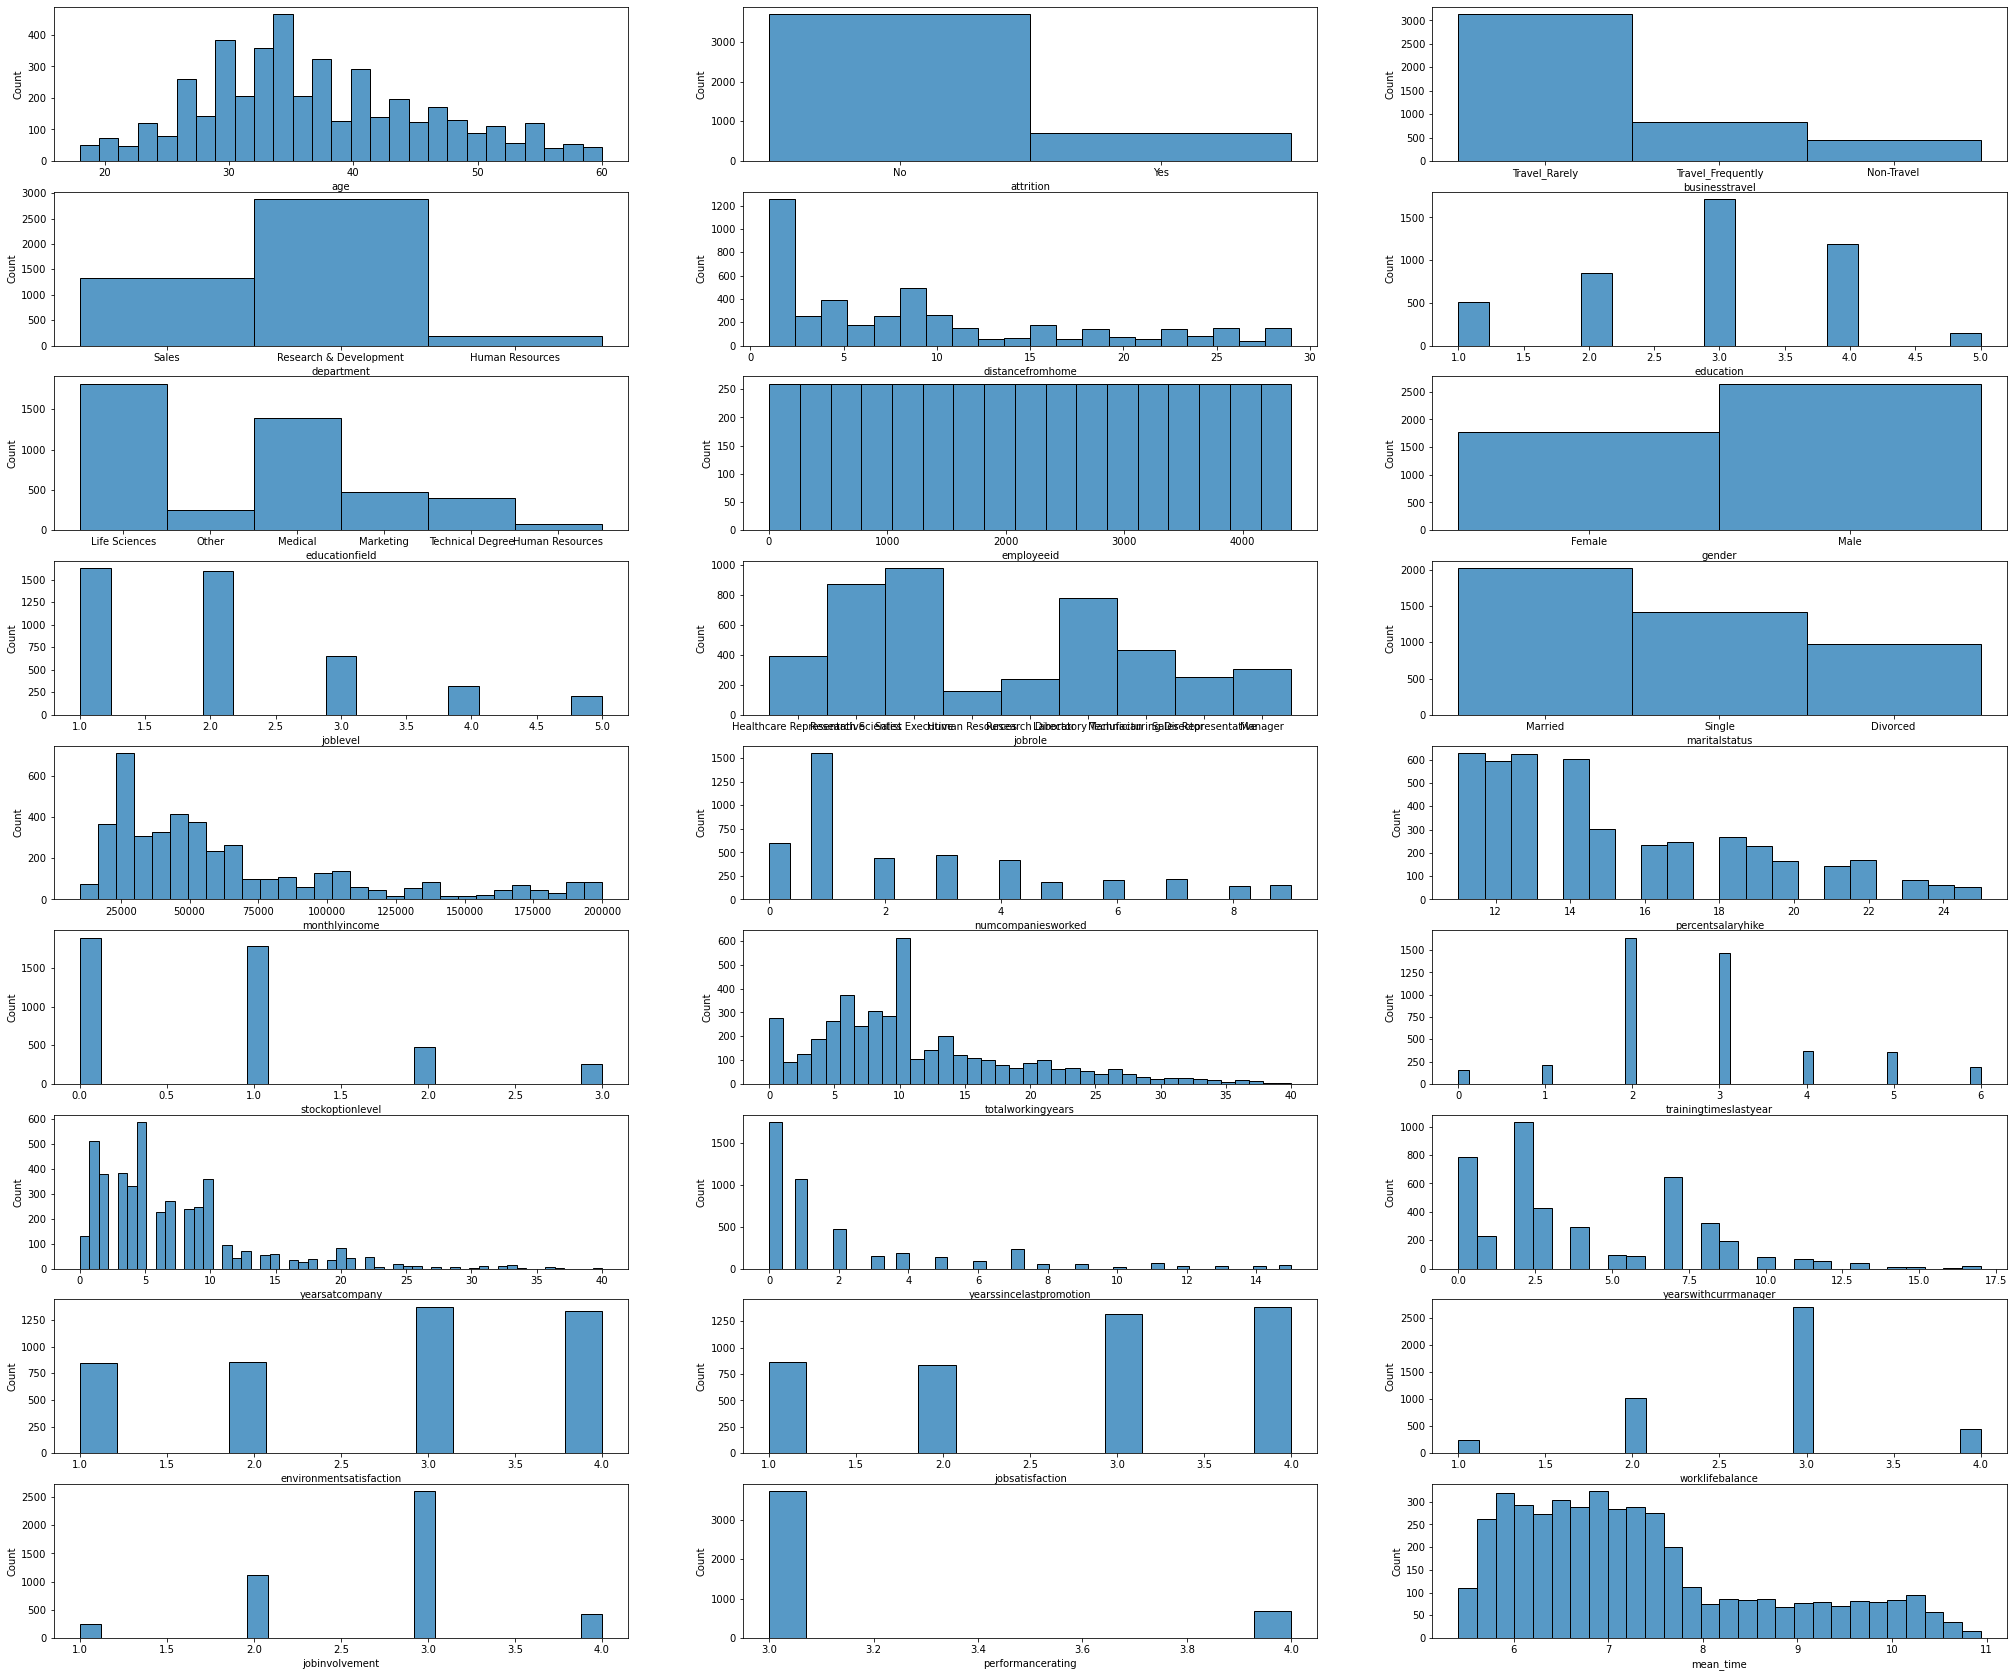

In [109]:
plt.figure(figsize=(35,30))
for i, column in enumerate(general.columns,1):
    plt.subplot(9,3,i)
    sns.histplot(general[column])

In [110]:
# Change type from integer to category for education feature
general['education'] = general['education'].astype('category') 


In [111]:
general.dtypes

age                           int64
attrition                    object
businesstravel               object
department                   object
distancefromhome              int64
education                  category
educationfield               object
employeeid                    int64
gender                       object
joblevel                      int64
jobrole                      object
maritalstatus                object
monthlyincome                 int64
numcompaniesworked            int64
percentsalaryhike             int64
stockoptionlevel              int64
totalworkingyears             int64
trainingtimeslastyear         int64
yearsatcompany                int64
yearssincelastpromotion       int64
yearswithcurrmanager          int64
environmentsatisfaction       int64
jobsatisfaction               int64
worklifebalance               int64
jobinvolvement                int64
performancerating             int64
mean_time                   float64
dtype: object

## Change type of categorical features

In [112]:
general[['joblevel','education','stockoptionlevel','environmentsatisfaction', 'jobsatisfaction', 'worklifebalance','jobinvolvement','performancerating']]=general[['joblevel','education','stockoptionlevel','environmentsatisfaction', 'jobsatisfaction', 'worklifebalance','jobinvolvement','performancerating']].astype(object)

In [113]:
general.dtypes

age                          int64
attrition                   object
businesstravel              object
department                  object
distancefromhome             int64
education                   object
educationfield              object
employeeid                   int64
gender                      object
joblevel                    object
jobrole                     object
maritalstatus               object
monthlyincome                int64
numcompaniesworked           int64
percentsalaryhike            int64
stockoptionlevel            object
totalworkingyears            int64
trainingtimeslastyear        int64
yearsatcompany               int64
yearssincelastpromotion      int64
yearswithcurrmanager         int64
environmentsatisfaction     object
jobsatisfaction             object
worklifebalance             object
jobinvolvement              object
performancerating           object
mean_time                  float64
dtype: object

## Numerical features 

In [114]:
numerical = general.select_dtypes(np.number)
numerical = numerical.drop(['employeeid'], axis = 1).reset_index(drop = True)
numerical

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
0,51,6,131160,1,11,1,6,1,0,0,6.870229
1,31,10,41890,0,23,6,3,5,1,4,7.315971
2,32,17,193280,1,15,5,2,5,0,3,6.816081
3,38,2,83210,3,11,13,5,8,7,5,6.789215
4,32,10,23420,4,12,9,2,6,0,4,7.877561
...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,3,17,10,5,3,0,2,8.316921
4406,29,2,26790,2,15,10,2,3,0,2,5.897197
4407,25,25,37020,0,20,5,4,4,1,2,7.149526
4408,42,18,23980,0,14,10,2,9,7,8,9.187612


## Standardize numerical features

In [115]:
#zscore=(numerical-numerical.mean())/numerical.std()
#zscore
#numerical.mean()

In [116]:
corr=numerical.corr()
corr

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
age,1.000000,0.006963,-0.044314,0.299297,-0.033137,0.680340,-0.027308,0.311309,0.216513,0.202089,-0.000377
distancefromhome,0.006963,1.000000,-0.021607,-0.012617,0.038125,0.009314,-0.009001,0.031684,0.002290,0.021584,0.009928
monthlyincome,-0.044314,-0.021607,1.000000,-0.019915,0.004325,-0.033758,0.050112,0.000995,0.065219,0.024304,-0.012430
numcompaniesworked,0.299297,-0.012617,-0.019915,1.000000,0.031683,0.238774,-0.032123,-0.116322,-0.035421,-0.108223,-0.015705
percentsalaryhike,-0.033137,0.038125,0.004325,0.031683,1.000000,-0.018810,-0.037392,-0.029707,-0.029542,-0.040864,0.026640
totalworkingyears,0.680340,0.009314,-0.033758,0.238774,-0.018810,1.000000,-0.040843,0.626737,0.404015,0.458403,-0.012385
trainingtimeslastyear,-0.027308,-0.009001,0.050112,-0.032123,-0.037392,-0.040843,1.000000,-0.007894,0.016121,-0.013270,-0.007777
yearsatcompany,0.311309,0.031684,0.000995,-0.116322,-0.029707,0.626737,-0.007894,1.000000,0.618409,0.769212,-0.021670
yearssincelastpromotion,0.216513,0.002290,0.065219,-0.035421,-0.029542,0.404015,0.016121,0.618409,1.000000,0.510224,-0.010831
yearswithcurrmanager,0.202089,0.021584,0.024304,-0.108223,-0.040864,0.458403,-0.013270,0.769212,0.510224,1.000000,-0.035379


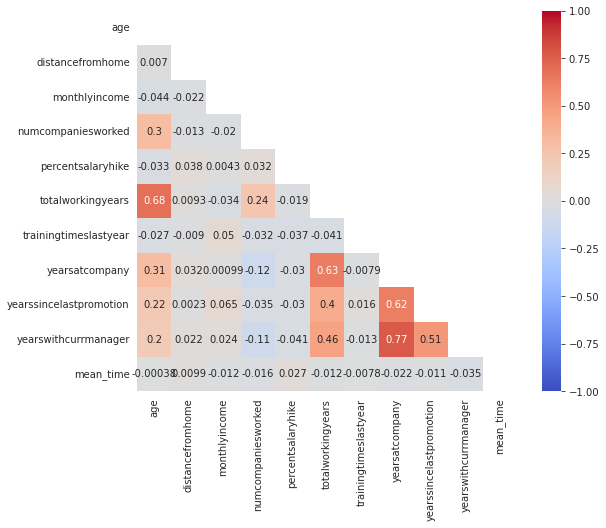

In [117]:
import statsmodels.api as sm
from scipy.stats import boxcox
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9, 7))
    multicollinearity_ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [118]:
numerical_targ = pd.concat([numerical, general['attrition']],axis=1)

In [119]:
numerical_targ

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,51,6,131160,1,11,1,6,1,0,0,6.870229,No
1,31,10,41890,0,23,6,3,5,1,4,7.315971,Yes
2,32,17,193280,1,15,5,2,5,0,3,6.816081,No
3,38,2,83210,3,11,13,5,8,7,5,6.789215,No
4,32,10,23420,4,12,9,2,6,0,4,7.877561,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,3,17,10,5,3,0,2,8.316921,No
4406,29,2,26790,2,15,10,2,3,0,2,5.897197,No
4407,25,25,37020,0,20,5,4,4,1,2,7.149526,No
4408,42,18,23980,0,14,10,2,9,7,8,9.187612,No


In [120]:
numerical_targ['attrition'] = numerical_targ['attrition'].apply(lambda x:0 if x=="No" else 1)
numerical_targ


,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4406,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4407,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4408,42,18,23980,0,14,10,2,9,7,8,9.187612,0


In [121]:
numerical_targ['attrition'].value_counts()

0    3699
1     711
Name: attrition, dtype: int64

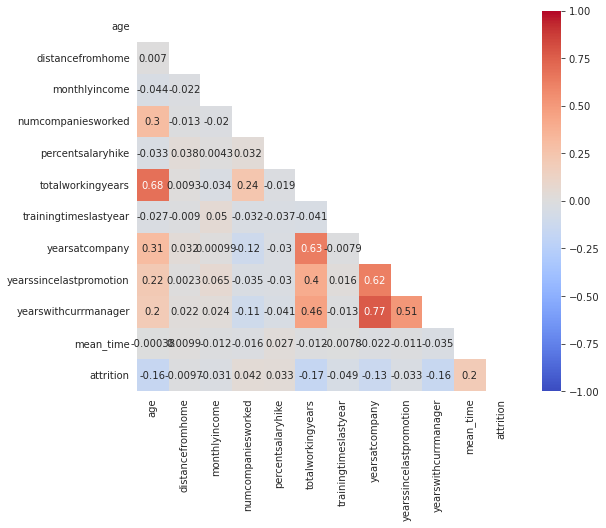

In [122]:
corr=numerical_targ.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9, 7))
    multicollinearity_ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Modeling

## Numerical features : Logistic regression

### Xy split

In [123]:
X= numerical
y= numerical_targ.attrition


### Train/Test split

In [124]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
X_train

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
1469,40,28,54680,0,12,22,6,21,3,9,6.442976
46,39,5,21050,0,20,19,3,18,3,7,7.207423
4283,50,19,53770,4,14,16,3,2,2,1,6.682018
3009,39,1,42840,4,17,12,0,1,0,0,9.455096
3593,25,1,109320,1,11,1,3,1,1,0,9.068935
...,...,...,...,...,...,...,...,...,...,...,...
1593,30,3,59680,1,13,1,3,1,0,0,6.372265
4060,42,1,23720,3,12,14,3,0,0,0,8.204401
1346,26,17,48770,1,13,8,5,8,5,7,7.598899
3454,56,1,52280,2,11,18,4,5,0,3,6.559152


### Standardize

In [125]:

std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)
X_train_scaled

array([[ 0.34592466,  2.3370422 , -0.21709092, ...,  0.26740389,
         1.39429979, -0.66644793],
       [ 0.23762147, -0.5132942 , -0.93023811, ...,  0.26740389,
         0.82836678, -0.09291515],
       [ 1.42895653,  1.22169318, -0.23638809, ..., -0.04610762,
        -0.86943222, -0.48710479],
       ...,
       [-1.17031996,  0.97383784, -0.34241652, ...,  0.89442691,
         0.82836678,  0.20079305],
       [ 2.07877566, -1.00900487, -0.26798456, ..., -0.67313064,
        -0.30349922, -0.57928601],
       [-0.08728809, -0.5132942 , -0.37634561, ..., -0.67313064,
         0.82836678, -1.32054731]])

In [126]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled

array([[-0.08728809, -0.5132942 , -0.2304505 , ...,  1.52144993,
         0.82836678, -0.97335931],
       [ 0.8874406 , -0.8850772 , -0.08858447, ...,  0.26740389,
        -0.86943222, -1.31385072],
       [ 1.53725972,  1.71740386,  2.71014186, ..., -0.04610762,
         0.82836678,  0.52975856],
       ...,
       [-0.73710721, -1.00900487,  2.31868491, ...,  1.52144993,
        -0.02053272, -0.67060515],
       [ 0.77913741, -0.63722187, -0.47283148, ...,  0.26740389,
         1.67726629, -0.65300454],
       [-0.62880403,  2.3370422 ,  1.32541062, ..., -0.67313064,
        -0.58646572, -0.28192528]])

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.844185,0.852608
1,Precision,0.652632,0.588235
2,Recall,0.121569,0.099502


Confusion matrix for the train set
[[2544   33]
 [ 448   62]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


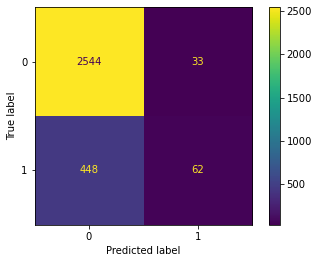



Confusion matrix for the test set
[[1108   14]
 [ 181   20]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


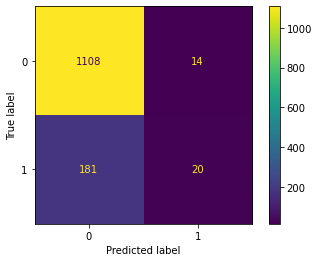

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Categorical features

In [128]:
categorical = general.select_dtypes(include=object)
categorical = categorical.drop(['attrition'], axis=1).reset_index(drop = True)
categorical

,businesstravel,department,education,educationfield,gender,joblevel,jobrole,maritalstatus,stockoptionlevel,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,Travel_Rarely,Sales,2,Life Sciences,Female,1,Healthcare Representative,Married,0,3,4,2,3,3
1,Travel_Frequently,Research & Development,1,Life Sciences,Female,1,Research Scientist,Single,1,3,2,4,2,4
2,Travel_Frequently,Research & Development,4,Other,Male,4,Sales Executive,Married,3,2,2,1,3,3
3,Non-Travel,Research & Development,5,Life Sciences,Male,3,Human Resources,Married,3,4,4,3,2,3
4,Travel_Rarely,Research & Development,1,Medical,Male,1,Sales Executive,Single,2,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,4,Medical,Female,1,Research Scientist,Single,1,4,1,3,3,3
4406,Travel_Rarely,Research & Development,4,Medical,Male,1,Laboratory Technician,Divorced,0,4,4,3,2,3
4407,Travel_Rarely,Research & Development,2,Life Sciences,Male,2,Sales Executive,Married,0,1,3,3,3,4
4408,Travel_Rarely,Sales,2,Medical,Male,1,Laboratory Technician,Divorced,1,4,1,3,2,3


In [129]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

### Ordinal encoding

In [130]:
cat_ord = categorical[['businesstravel']]

In [131]:
categories = [['Non-Travel','Travel_Rarely','Travel_Frequently']]

In [132]:
categorical['education'].value_counts()

3    1716
4    1194
2     846
1     510
5     144
Name: education, dtype: int64

In [133]:
ordinal_encoder = OrdinalEncoder(categories=categories)
cat_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(cat_ord),columns=cat_ord.columns)

In [134]:
cat_ord_2 = categorical[['education','joblevel', 'stockoptionlevel', 'environmentsatisfaction','worklifebalance','jobsatisfaction','jobinvolvement','performancerating']]

In [135]:
cat_ord_encoded

,businesstravel
0,1.0
1,2.0
2,2.0
3,0.0
4,1.0
...,...
4405,1.0
4406,1.0
4407,1.0
4408,1.0


In [136]:
cat_ord = pd.concat([cat_ord_2, cat_ord_encoded], axis=1)

In [137]:
cat_ord

,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel
0,2,1,0,3,2,4,3,3,1.0
1,1,1,1,3,4,2,2,4,2.0
2,4,4,3,2,1,2,3,3,2.0
3,5,3,3,4,3,4,2,3,0.0
4,1,1,2,4,3,1,3,3,1.0
...,...,...,...,...,...,...,...,...,...
4405,4,1,1,4,3,1,3,3,1.0
4406,4,1,0,4,3,4,2,3,1.0
4407,2,2,0,1,3,3,3,4,1.0
4408,2,1,1,4,3,1,2,3,1.0


In [138]:
categorical

,businesstravel,department,education,educationfield,gender,joblevel,jobrole,maritalstatus,stockoptionlevel,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,Travel_Rarely,Sales,2,Life Sciences,Female,1,Healthcare Representative,Married,0,3,4,2,3,3
1,Travel_Frequently,Research & Development,1,Life Sciences,Female,1,Research Scientist,Single,1,3,2,4,2,4
2,Travel_Frequently,Research & Development,4,Other,Male,4,Sales Executive,Married,3,2,2,1,3,3
3,Non-Travel,Research & Development,5,Life Sciences,Male,3,Human Resources,Married,3,4,4,3,2,3
4,Travel_Rarely,Research & Development,1,Medical,Male,1,Sales Executive,Single,2,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,4,Medical,Female,1,Research Scientist,Single,1,4,1,3,3,3
4406,Travel_Rarely,Research & Development,4,Medical,Male,1,Laboratory Technician,Divorced,0,4,4,3,2,3
4407,Travel_Rarely,Research & Development,2,Life Sciences,Male,2,Sales Executive,Married,0,1,3,3,3,4
4408,Travel_Rarely,Sales,2,Medical,Male,1,Laboratory Technician,Divorced,1,4,1,3,2,3


### Nominal Encoding

In [139]:
cat_nom = categorical[['department','educationfield','gender','jobrole','maritalstatus']]
cat_nom

,department,educationfield,gender,jobrole,maritalstatus
0,Sales,Life Sciences,Female,Healthcare Representative,Married
1,Research & Development,Life Sciences,Female,Research Scientist,Single
2,Research & Development,Other,Male,Sales Executive,Married
3,Research & Development,Life Sciences,Male,Human Resources,Married
4,Research & Development,Medical,Male,Sales Executive,Single
...,...,...,...,...,...
4405,Research & Development,Medical,Female,Research Scientist,Single
4406,Research & Development,Medical,Male,Laboratory Technician,Divorced
4407,Research & Development,Life Sciences,Male,Sales Executive,Married
4408,Sales,Medical,Male,Laboratory Technician,Divorced


In [140]:
cat_nom_encoded = pd.get_dummies(cat_nom)
cat_nom_encoded

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [141]:
cat_encoded = pd.concat([cat_nom_encoded, cat_ord], axis=1)

In [142]:
cat_encoded

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0


In [143]:
## General merge (All features)

In [144]:
hr = pd.concat([cat_encoded, numerical_targ], axis=1)
hr

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612,0


In [145]:
### ALEJANDRA

## Numerical and categorical features: logistic regression

### Xy split

In [146]:
X = hr.iloc[:,:-1]
X

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612


In [147]:
y = hr.iloc[:,-1]
y

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: attrition, Length: 4410, dtype: int64

### Train/test split

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LogisticRegression()

(4410, 43)
(4410,)


In [149]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.83980583, 0.84142395, 0.83954619, 0.84116694, 0.84116694])

In [150]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.00


### Standardize

In [151]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.866213,0.857143
1,Precision,0.690476,0.640777
2,Recall,0.294118,0.302752


Confusion matrix for the train set
[[2529   65]
 [ 348  145]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


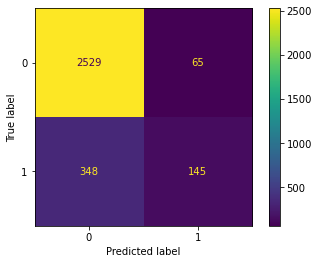



Confusion matrix for the test set
[[1068   37]
 [ 152   66]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


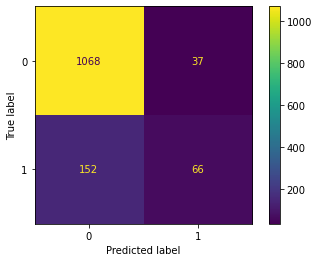

In [152]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Handling outliers numerical

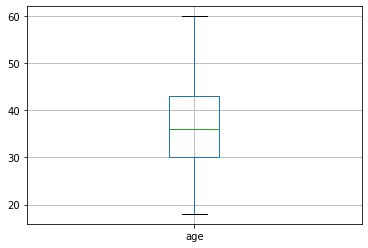

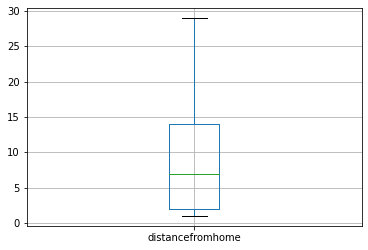

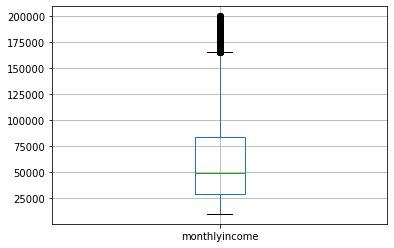

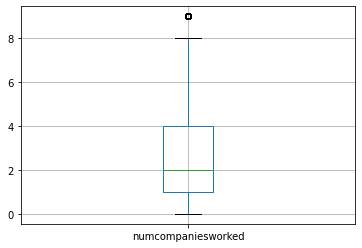

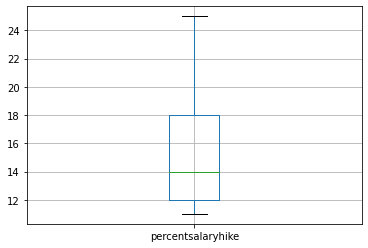

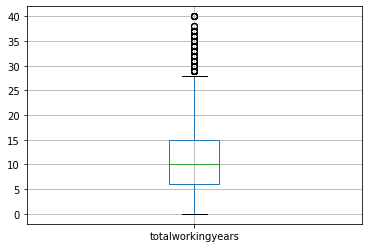

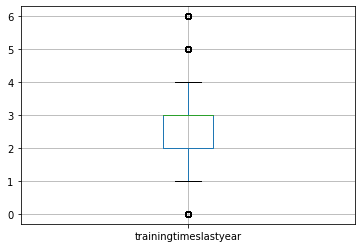

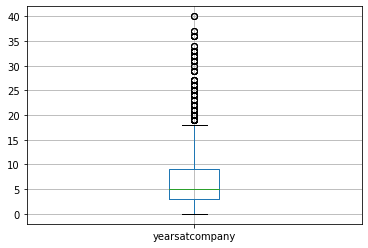

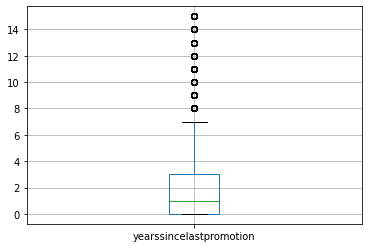

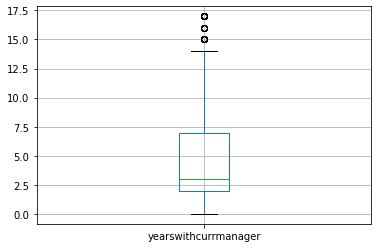

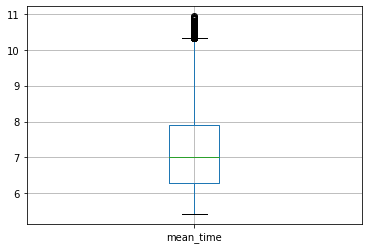

In [153]:
for column in numerical:
    plt.figure()
    numerical.boxplot([column])

### IQR

In [154]:
def outliers(hr, columns_list):
    #limits = list()
    for col in columns_list:
        Q1= hr[col].quantile(0.25)
        Q3 = hr[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        #limits.append((lower_limit, upper_limit))
        print(upper_limit)
        new_hr = hr[(hr[col] < upper_limit) & (hr[col] > lower_limit)]
    return new_hr.reset_index(drop=True)


new_hr = outliers(hr,['monthlyincome','numcompaniesworked','totalworkingyears','trainingtimeslastyear',
                     'yearsatcompany','yearssincelastpromotion','yearswithcurrmanager','mean_time'])

165835.0
8.5
28.5
4.5
18.0
7.5
14.5
10.332849871708925


In [155]:
new_hr

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4287,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4288,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4289,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612,0


### Log without outliers

In [156]:
X = new_hr.iloc[:,:-1]
X

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921
4287,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197
4288,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526
4289,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612


In [157]:
y= new_hr.iloc[:,-1]
y

0       0
1       1
2       0
3       0
4       0
       ..
4286    0
4287    0
4288    0
4289    0
4290    0
Name: attrition, Length: 4291, dtype: int64

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LogisticRegression()

(4291, 43)
(4291,)


In [159]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.84026622, 0.84026622, 0.84026622, 0.84      , 0.84      ])

In [160]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.00


In [161]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.869464,0.866460
1,Precision,0.717822,0.703704
2,Recall,0.302083,0.278049


Confusion matrix for the train set
[[2466   57]
 [ 335  145]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


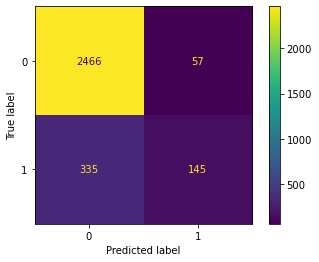



Confusion matrix for the test set
[[1059   24]
 [ 148   57]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


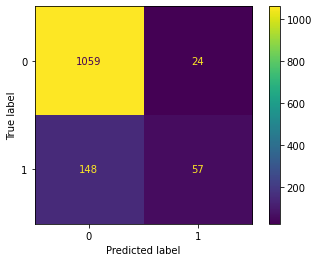

In [162]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Upsampling: SMOTE

### With outliers

In [163]:
hr

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612,0


In [164]:
hr.dtypes

department_Human Resources             uint8
department_Research & Development      uint8
department_Sales                       uint8
educationfield_Human Resources         uint8
educationfield_Life Sciences           uint8
educationfield_Marketing               uint8
educationfield_Medical                 uint8
educationfield_Other                   uint8
educationfield_Technical Degree        uint8
gender_Female                          uint8
gender_Male                            uint8
jobrole_Healthcare Representative      uint8
jobrole_Human Resources                uint8
jobrole_Laboratory Technician          uint8
jobrole_Manager                        uint8
jobrole_Manufacturing Director         uint8
jobrole_Research Director              uint8
jobrole_Research Scientist             uint8
jobrole_Sales Executive                uint8
jobrole_Sales Representative           uint8
maritalstatus_Divorced                 uint8
maritalstatus_Married                  uint8
maritalsta

In [165]:
hr.iloc[:, 23:32] = hr.iloc[:, 23:32].astype(int)

In [166]:
#hr['education','joblevel', 'stockoptionlevel', 'environmentsatisfaction','worklifebalance', 'jobsatisfaction','jobinvolvement','performancerating'] = hr['education','joblevel', 'stockoptionlevel', 'environmentsatisfaction','worklifebalance', 'jobsatisfaction','jobinvolvement','performancerating'].apply(pd.to_numeric)

In [167]:
hr.dtypes

department_Human Resources             uint8
department_Research & Development      uint8
department_Sales                       uint8
educationfield_Human Resources         uint8
educationfield_Life Sciences           uint8
educationfield_Marketing               uint8
educationfield_Medical                 uint8
educationfield_Other                   uint8
educationfield_Technical Degree        uint8
gender_Female                          uint8
gender_Male                            uint8
jobrole_Healthcare Representative      uint8
jobrole_Human Resources                uint8
jobrole_Laboratory Technician          uint8
jobrole_Manager                        uint8
jobrole_Manufacturing Director         uint8
jobrole_Research Director              uint8
jobrole_Research Scientist             uint8
jobrole_Sales Executive                uint8
jobrole_Sales Representative           uint8
maritalstatus_Divorced                 uint8
maritalstatus_Married                  uint8
maritalsta

In [168]:
X= hr.iloc[:,:-1]
y= hr.iloc[:,-1]

In [169]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [170]:
y.value_counts()

0    3699
1     711
Name: attrition, dtype: int64

In [171]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    3699
1    3699
Name: attrition, dtype: int64

In [172]:
X= X_sm
y= y_sm

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LogisticRegression()

In [174]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.5019305 , 0.50289575, 0.50289575, 0.6115942 , 0.73816425])

In [175]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.57 accuracy with a standard deviation of 0.09


In [176]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.830243,0.816667
1,Precision,0.868753,0.855865
2,Recall,0.776009,0.766696


Confusion matrix for the train set
[[2300  302]
 [ 577 1999]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


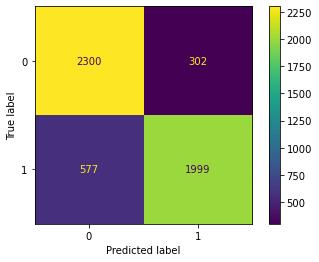



Confusion matrix for the test set
[[952 145]
 [262 861]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


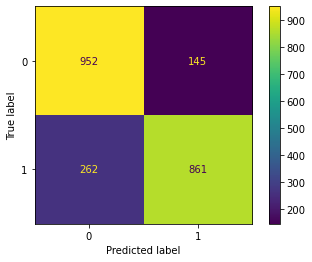

In [177]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [178]:
#convert all object into int also in new_hr, dataframe without outliers
new_hr.iloc[:, 23:32] = new_hr.iloc[:, 23:32].astype(int)

### Without outliers

In [179]:
X= new_hr.iloc[:,:-1]
y=new_hr.iloc[:,-1]

In [180]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    3606
1    3606
Name: attrition, dtype: int64

In [181]:
X= X_sm
y= y_sm

In [182]:
#assigning a SMOTE dataframe ()
hr_up = pd.concat([X_sm, y_sm], axis=1)
hr_up['attrition'].value_counts()
hr_up

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,1,1,3,2,3,1,35,8,30689,4,15,13,3,11,8,5,6.152908,1
7208,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,1,3,2,3,3,1,30,7,29368,2,13,3,2,1,1,1,8.155342,1
7209,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,4,2,0,2,3,3,4,3,1,35,2,108830,3,12,8,3,1,0,1,8.679284,1
7210,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,1,3,2,3,3,0,26,1,97914,1,19,3,1,3,1,2,7.436715,1


In [183]:
X= hr_up.iloc[:,:-1]
y=hr_up.iloc[:,-1]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LogisticRegression()

In [185]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

array([0.68415842, 0.64653465, 0.77425743, 0.73538157, 0.7086224 ])

In [186]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.04


In [187]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.829437,0.832255
1,Precision,0.871705,0.875000
2,Recall,0.777125,0.764482


Confusion matrix for the train set
[[2203  292]
 [ 569 1984]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


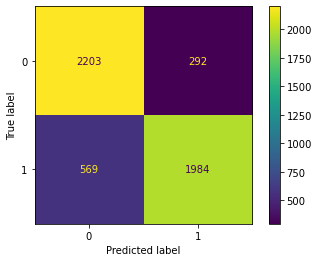



Confusion matrix for the test set
[[996 115]
 [248 805]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


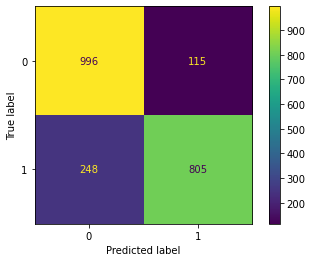

In [188]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

### assign new dataframe with smote y

In [189]:
#hr_up = pd.concat([X_sm, y_sm], axis=1)
#hr_up['attrition'].value_counts()

In [190]:
hr_up.dtypes

department_Human Resources             uint8
department_Research & Development      uint8
department_Sales                       uint8
educationfield_Human Resources         uint8
educationfield_Life Sciences           uint8
educationfield_Marketing               uint8
educationfield_Medical                 uint8
educationfield_Other                   uint8
educationfield_Technical Degree        uint8
gender_Female                          uint8
gender_Male                            uint8
jobrole_Healthcare Representative      uint8
jobrole_Human Resources                uint8
jobrole_Laboratory Technician          uint8
jobrole_Manager                        uint8
jobrole_Manufacturing Director         uint8
jobrole_Research Director              uint8
jobrole_Research Scientist             uint8
jobrole_Sales Executive                uint8
jobrole_Sales Representative           uint8
maritalstatus_Divorced                 uint8
maritalstatus_Married                  uint8
maritalsta

## Random forest

In [191]:
X= hr_up.iloc[:,:-1]
y=hr_up.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10, random_state=0)

In [192]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.97746967, 0.96967071, 0.96880416, 0.97746967, 0.97311362])

In [193]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.00


In [194]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [195]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

#high score. no need to improve the model

0.9920263477205755
0.9792099792099792


In [196]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {
    #'n_estimators': [100,200],
    #'max_depth': [8, 10],
    #'max_features': ['sqrt', 'log2']

    #}
#clf = RandomForestClassifier(random_state=100)

In [197]:
#grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [198]:
#grid_search.fit(X_train,y_train)

In [199]:
#grid_search.best_params_

In [200]:
## newforest with suggested parameters
#clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100, random_state=0)
#clf.fit(X_train, y_train)
#print(clf.score(X_train, y_train))
#print(clf.score(X_test, y_test))

In [201]:
#Calculating the mean of scores
#from sklearn.model_selection import cross_val_score
#clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100, random_state=0)
#cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
#print(np.mean(cross_val_scores))

### Features importance

In [202]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [203]:
new_hr_feat_imp = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
new_hr_feat_imp.columns = ['columns_name', 'score_feature_importance']
sorted_feat = new_hr_feat_imp.sort_values(by=['score_feature_importance'], ascending = False)

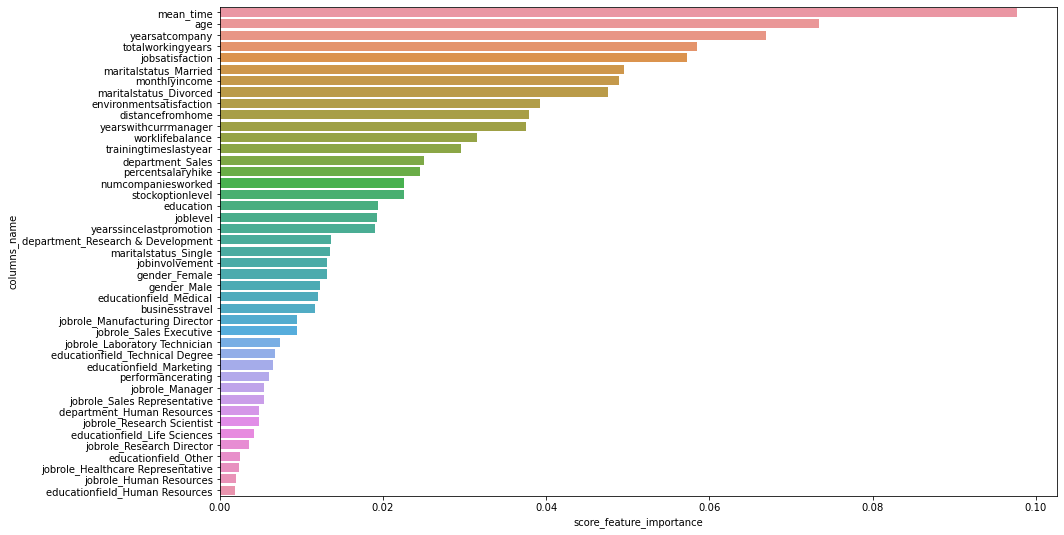

In [204]:
plot= sns.barplot(x=sorted_feat.score_feature_importance, y=sorted_feat.columns_name)
plt.gcf().set_size_inches(15,9)

In [205]:
hr_up.to_csv("Data/hr_up_df.csv")

In [206]:
hr_up[['mean_time','attrition']].groupby('attrition').mean()

,mean_time
attrition,
0,7.111929
1,7.808244


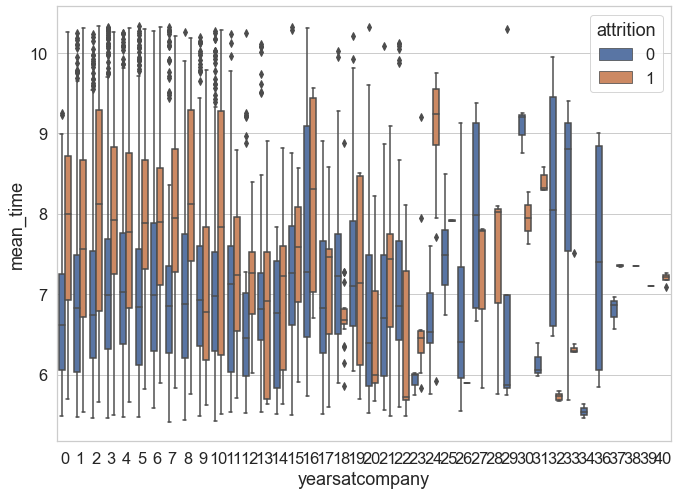

In [207]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
plot= sns.boxplot(y='mean_time',x='yearsatcompany', hue = 'attrition', data=hr_up)

## KNN (all features new_hr)

### XY split

In [208]:
X= hr_up.iloc[:,:-1]
y=hr_up.iloc[:,-1]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [210]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(neigh, X_train, y_train, cv=5)
scores

array([0.87521664, 0.89341421, 0.87608319, 0.8847487 , 0.8699046 ])

In [211]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.01


In [212]:
y_pred = cross_val_predict(neigh, X_test, y_test, cv=5)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

### Standardize

In [213]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [214]:
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


### KNN model

,Error_metric,Train,Test
0,Accuracy,0.966025,0.911296
1,Precision,0.986599,0.909216
2,Recall,0.944849,0.914246


Confusion matrix for the train set
[[2849   37]
 [ 159 2724]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


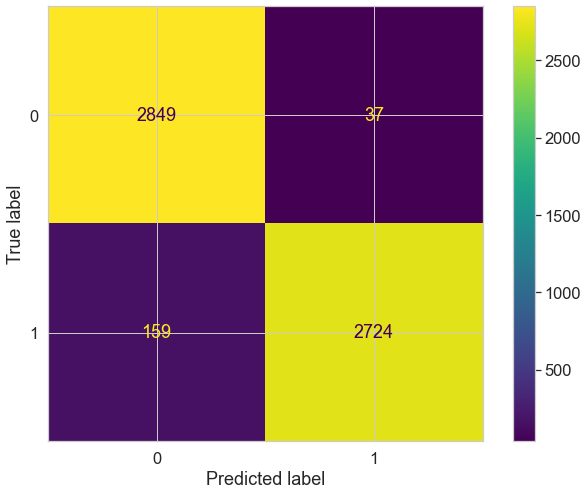



Confusion matrix for the test set
[[654  66]
 [ 62 661]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


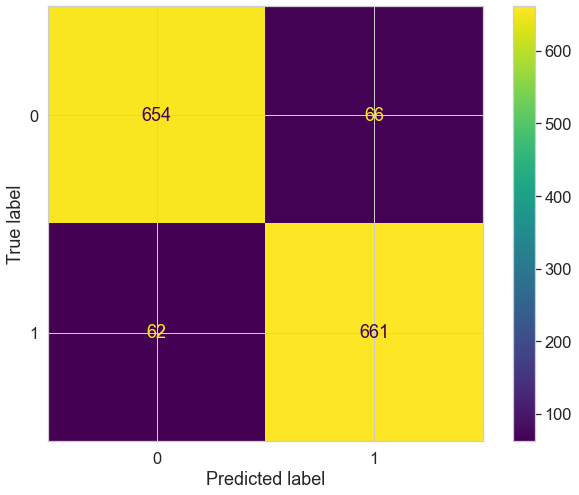

In [215]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

## ROC all features

In [216]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


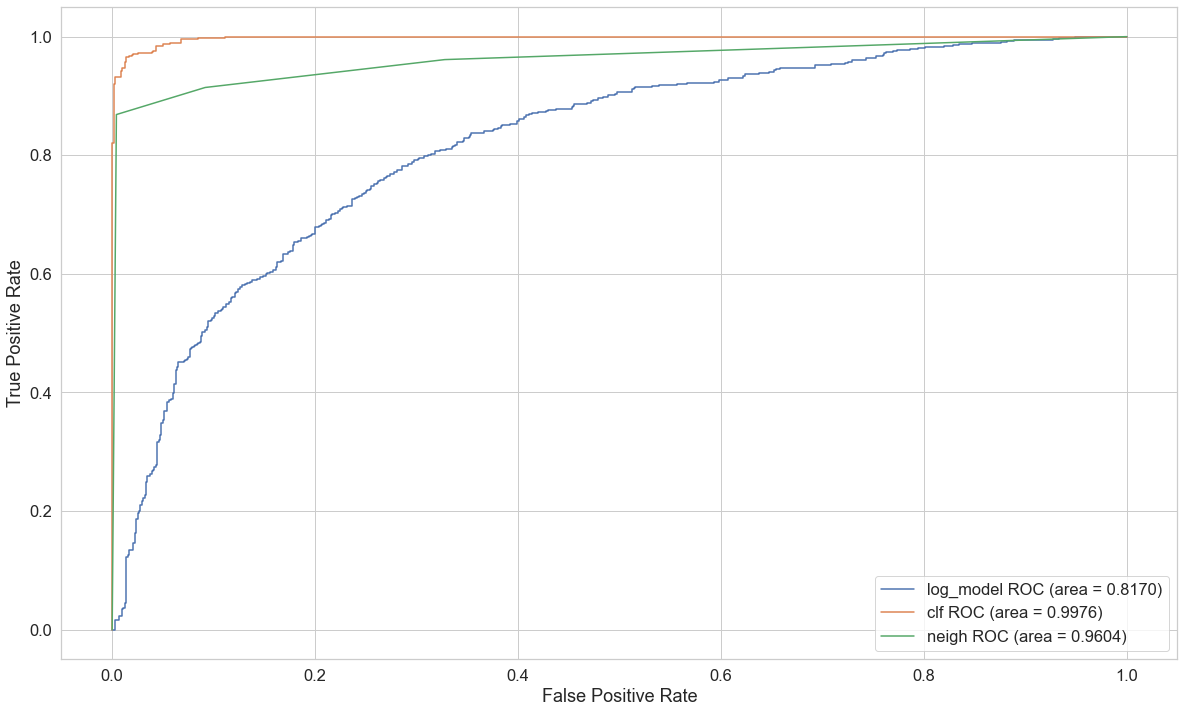

In [217]:
plt.figure(figsize=(20,12))

models = [{'label': 'log_model',
           'model': LogisticRegression()},
          {'label': 'clf',
           'model': RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,bootstrap=True,oob_score=True, random_state=0)},
          {'label': 'neigh',
           'model':  KNeighborsClassifier(n_neighbors=3)}]
           
           #'label': 'log_model_20',
           #'model': LogisticRegression(),
           
           #'label': 'neigh_20',
           #'model':  KNeighborsClassifier(n_neighbors=3),}]

#iterate each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    
    prob =  model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, prob)
     
    auc = roc_auc_score(y_test, prob)
    
    pyplot.plot(fpr,tpr, label=f"{m['label']} ROC (area = {auc:.4f})")
    # axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()

## 20 most important features (mif): Logistic Regression:

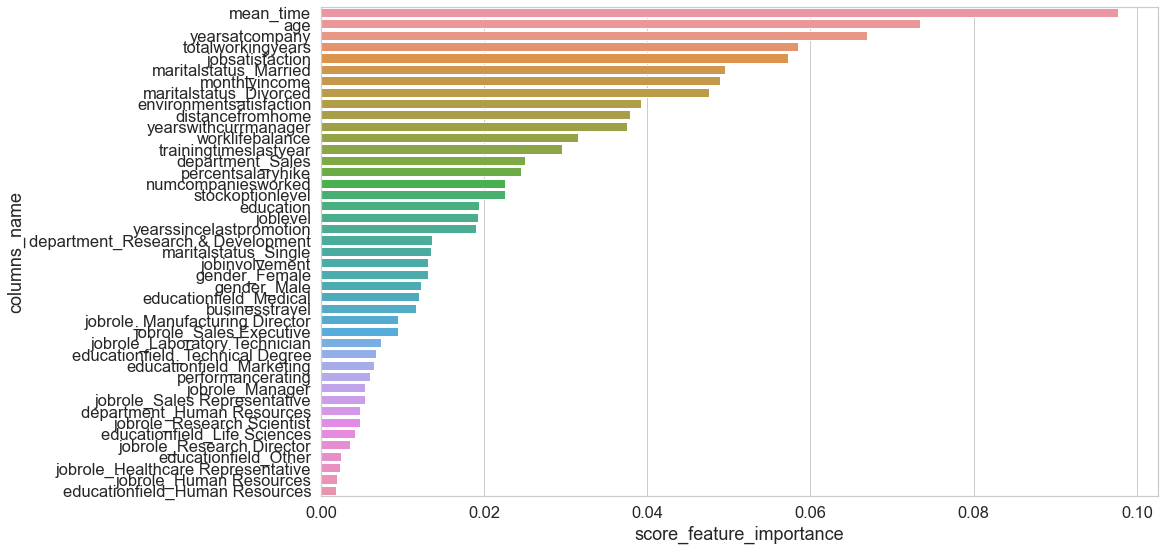

In [218]:
plot= sns.barplot(x=sorted_feat.score_feature_importance, y=sorted_feat.columns_name)
plt.gcf().set_size_inches(15,9)

In [219]:
#filtering the most important features
hr_feat = hr_up.filter(['mean_time','totalworkingyears','age','jobsatisfaction','yearswithcurrmanager','yearsatcompany','monthlyincome','maritalstatus_Married','maritalstatus_Divorced','enviromentsatisfaction','distancefromhome','trainingtimeslastyear','percentsalaryhike','worklifebalance', 'yearssincelastpromotion','numcompaniesworked','education','gender_Female','joblevel','stockoptionlevel' ,'attrition'], axis=1)
hr_feat

,mean_time,totalworkingyears,age,jobsatisfaction,yearswithcurrmanager,yearsatcompany,monthlyincome,maritalstatus_Married,maritalstatus_Divorced,distancefromhome,trainingtimeslastyear,percentsalaryhike,worklifebalance,yearssincelastpromotion,numcompaniesworked,education,gender_Female,joblevel,stockoptionlevel,attrition
0,6.870229,1,51,4,0,1,131160,1,0,6,6,11,2,0,1,2,1,1,0,0
1,7.315971,6,31,2,4,5,41890,0,0,10,3,23,4,1,0,1,1,1,1,1
2,6.816081,5,32,2,3,5,193280,1,0,17,2,15,1,0,1,4,0,4,3,0
3,6.789215,13,38,4,5,8,83210,1,0,2,5,11,3,7,3,5,0,3,3,0
4,7.877561,9,32,1,4,6,23420,0,0,10,2,12,3,0,4,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,6.152908,13,35,3,5,11,30689,0,0,8,3,15,1,8,4,3,0,2,0,1
7208,8.155342,3,30,2,1,1,29368,0,0,7,2,13,3,1,2,2,0,3,0,1
7209,8.679284,8,35,3,1,1,108830,1,0,2,3,12,3,0,3,4,1,2,0,1
7210,7.436715,3,26,2,2,3,97914,0,0,1,1,19,3,1,1,2,0,2,0,1


In [220]:
hr_feat.to_csv("Data/hr_feat_df.csv")

### XY Split

In [221]:
X = hr_feat.iloc[:,:-1]
X

,mean_time,totalworkingyears,age,jobsatisfaction,yearswithcurrmanager,yearsatcompany,monthlyincome,maritalstatus_Married,maritalstatus_Divorced,distancefromhome,trainingtimeslastyear,percentsalaryhike,worklifebalance,yearssincelastpromotion,numcompaniesworked,education,gender_Female,joblevel,stockoptionlevel
0,6.870229,1,51,4,0,1,131160,1,0,6,6,11,2,0,1,2,1,1,0
1,7.315971,6,31,2,4,5,41890,0,0,10,3,23,4,1,0,1,1,1,1
2,6.816081,5,32,2,3,5,193280,1,0,17,2,15,1,0,1,4,0,4,3
3,6.789215,13,38,4,5,8,83210,1,0,2,5,11,3,7,3,5,0,3,3
4,7.877561,9,32,1,4,6,23420,0,0,10,2,12,3,0,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,6.152908,13,35,3,5,11,30689,0,0,8,3,15,1,8,4,3,0,2,0
7208,8.155342,3,30,2,1,1,29368,0,0,7,2,13,3,1,2,2,0,3,0
7209,8.679284,8,35,3,1,1,108830,1,0,2,3,12,3,0,3,4,1,2,0
7210,7.436715,3,26,2,2,3,97914,0,0,1,1,19,3,1,1,2,0,2,0


In [222]:
y= hr_feat.iloc[:,-1]
y

0       0
1       1
2       0
3       0
4       0
       ..
7207    1
7208    1
7209    1
7210    1
7211    1
Name: attrition, Length: 7212, dtype: int64

In [223]:
y.value_counts()

0    3606
1    3606
Name: attrition, dtype: int64

### Train/Test Split

In [224]:
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
log_model_20 = LogisticRegression()

(7212, 19)
(7212,)


In [225]:
scores=cross_val_score(log_model_20, X_train, y_train, cv=5)
scores

array([0.65511265, 0.50086655, 0.71403813, 0.50086655, 0.73720729])

In [226]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.62 accuracy with a standard deviation of 0.10


### Standardize

In [227]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.776044,0.787942
1,Precision,0.783369,0.806122
2,Recall,0.762153,0.761708


Confusion matrix for the train set
[[2282  607]
 [ 685 2195]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


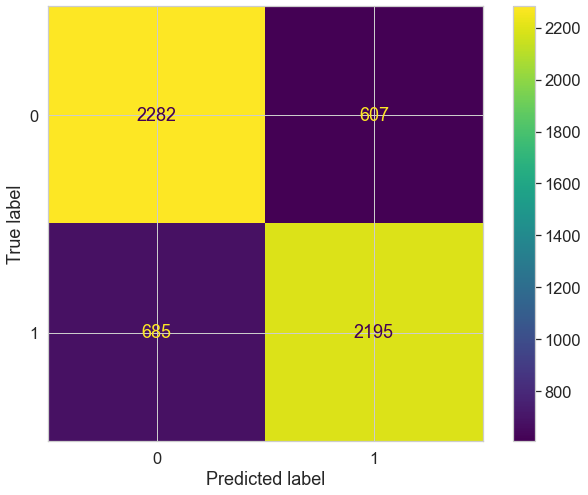



Confusion matrix for the test set
[[584 133]
 [173 553]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


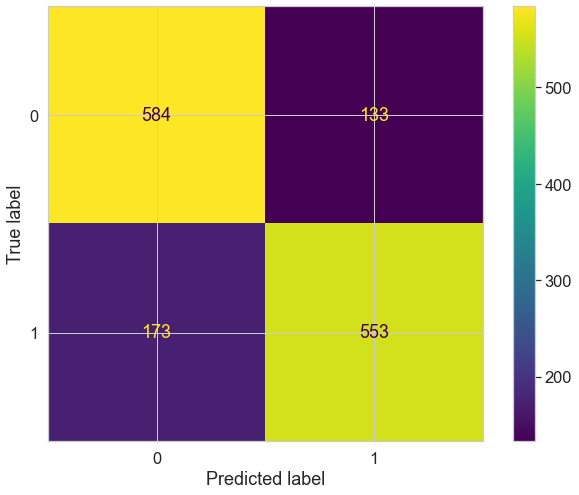

In [228]:
log_model_20 = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model_20.fit(X_train_mod, y_train)

y_pred_train_log = log_model_20.predict(X_train_mod)
y_pred_test_log = log_model_20.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model_20,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model_20,X_test_mod,y_test, values_format = 'd')
plt.show()

## 20 mif: Random Forest

In [229]:
model = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10, random_state=0)

In [230]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.96187175, 0.95147314, 0.96533795, 0.95320624, 0.97311362])

In [231]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.01


In [232]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [233]:
from sklearn.ensemble import RandomForestClassifier
clf_20 = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,random_state=0)
clf_20.fit(X_train, y_train)
print(clf_20.score(X_train, y_train))
print(clf_20.score(X_test, y_test))

#high score. no need to improve the model

0.9800658693014387
0.9653499653499653


In [234]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [235]:
new_hr_feat_imp = pd.DataFrame(list(zip(feature_names, clf_20.feature_importances_)))
new_hr_feat_imp.columns = ['columns_name', 'score_feature_importance']
sorted_feat = new_hr_feat_imp.sort_values(by=['score_feature_importance'], ascending = False)

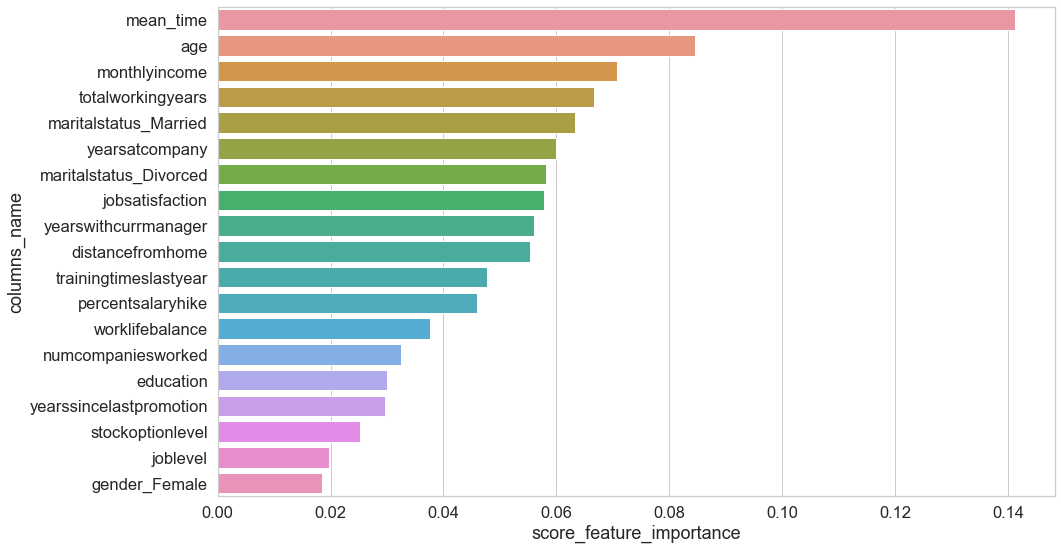

In [236]:
plot= sns.barplot(x=sorted_feat.score_feature_importance, y=sorted_feat.columns_name)
plt.gcf().set_size_inches(15,9)

## 20 mif: KNN

In [237]:
from sklearn.neighbors import KNeighborsClassifier
neigh_20 = KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(neigh_20, X_train, y_train, cv=5)
scores

array([0.85961872, 0.88388215, 0.8830156 , 0.88214905, 0.87684302])

In [238]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.01


In [239]:
y_pred = cross_val_predict(neigh_20, X_test, y_test, cv=5)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [240]:
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Error_metric,Train,Test
0,Accuracy,0.971399,0.925156
1,Precision,0.993816,0.954412
2,Recall,0.948611,0.893939


Confusion matrix for the train set
[[2872   17]
 [ 148 2732]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


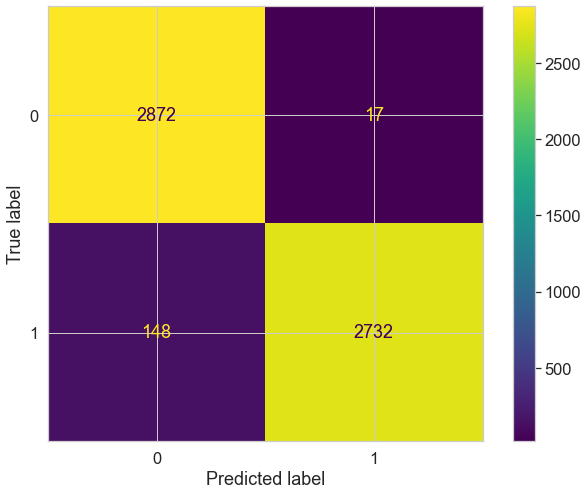



Confusion matrix for the test set
[[686  31]
 [ 77 649]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


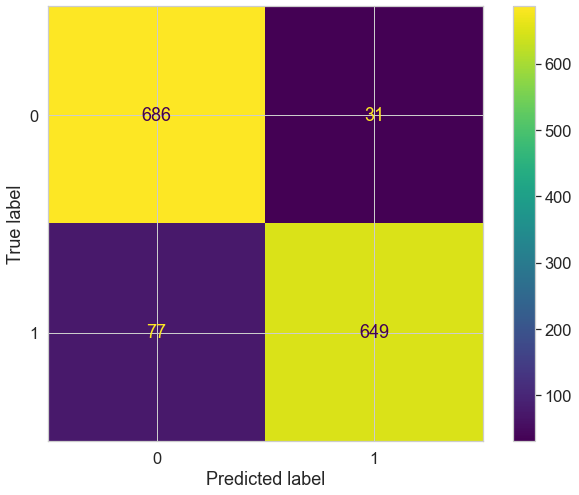

In [241]:
neigh_20 = KNeighborsClassifier(n_neighbors=3)
neigh_20.fit(X_train_k, y_train)
y_pred_train_knn = neigh_20.predict(X_train_k)
y_pred_test_knn = neigh_20.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh_20,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh_20,X_test_k,y_test, values_format = 'd')
plt.show()

## 20 mif : ROC Curve

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


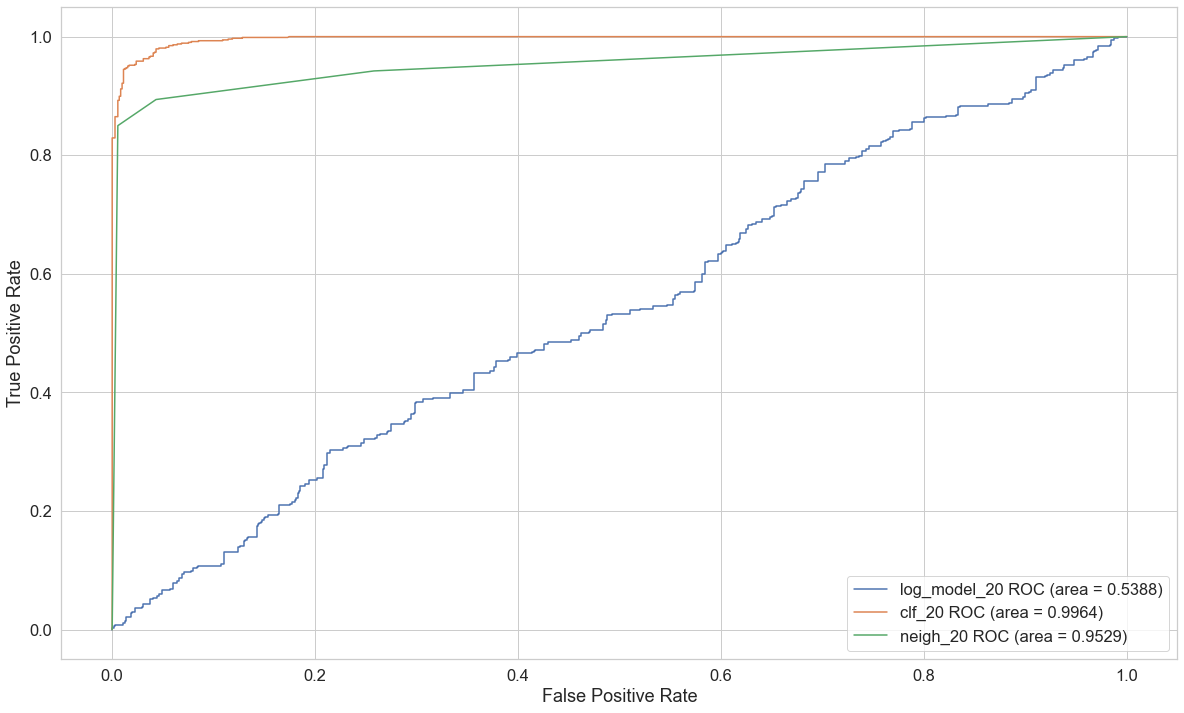

In [242]:
plt.figure(figsize=(20,12))

models = [{'label': 'log_model_20',
           'model': LogisticRegression()},
          {'label': 'clf_20',
           'model': RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,bootstrap=True,oob_score=True, random_state=0)},
          {'label': 'neigh_20',
           'model':  KNeighborsClassifier(n_neighbors=3)}]

#iterate each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    
    prob =  model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, prob)
     
    auc = roc_auc_score(y_test, prob)
    
    pyplot.plot(fpr,tpr, label=f"{m['label']} ROC (area = {auc:.4f})")
    # axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()